In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("forestfires.csv")

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df=df.drop(['wind','rain','area','dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'],axis=1)

In [5]:
df.head(11)

,month,day,FFMC,DMC,DC,ISI,temp,RH,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,small


In [6]:
df=df.drop(['month','day'],axis=1)

In [7]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,size_category
0,86.2,26.2,94.3,5.1,8.2,51,small
1,90.6,35.4,669.1,6.7,18.0,33,small
2,90.6,43.7,686.9,6.7,14.6,33,small
3,91.7,33.3,77.5,9.0,8.3,97,small
4,89.3,51.3,102.2,9.6,11.4,99,small


In [8]:
label_encoder = preprocessing.LabelEncoder()
df['size_category']= label_encoder.fit_transform(df['size_category'])

In [9]:
df.head(11)

,FFMC,DMC,DC,ISI,temp,RH,size_category
0,86.2,26.2,94.3,5.1,8.2,51,1
1,90.6,35.4,669.1,6.7,18.0,33,1
2,90.6,43.7,686.9,6.7,14.6,33,1
3,91.7,33.3,77.5,9.0,8.3,97,1
4,89.3,51.3,102.2,9.6,11.4,99,1
5,92.3,85.3,488.0,14.7,22.2,29,1
6,92.3,88.9,495.6,8.5,24.1,27,1
7,91.5,145.4,608.2,10.7,8.0,86,1
8,91.0,129.5,692.6,7.0,13.1,63,1
9,92.5,88.0,698.6,7.1,22.8,40,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   size_category  517 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 26.4 KB


<AxesSubplot:>

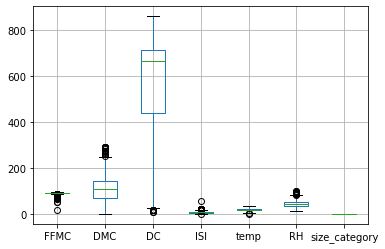

In [11]:
df.boxplot()

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'size_category'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

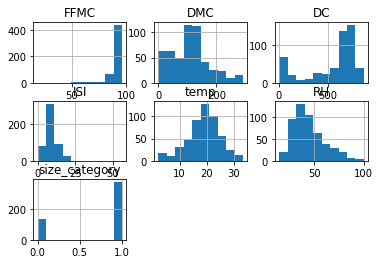

In [12]:
df.hist()

In [13]:
df[df.duplicated()].shape

(20, 7)

In [14]:
df[df.duplicated()]

,FFMC,DMC,DC,ISI,temp,RH,size_category
53,92.1,111.2,654.1,9.6,20.4,42,1
68,92.4,117.9,668.0,12.2,19.6,33,1
100,91.4,142.4,601.4,10.6,19.8,39,1
159,92.4,117.9,668.0,12.2,19.0,34,1
166,92.1,111.2,654.1,9.6,16.6,47,1
179,88.8,147.3,614.5,9.0,14.4,66,1
194,94.8,108.3,647.1,17.0,24.6,22,0
215,91.7,35.8,80.8,7.8,17.0,27,0
222,87.6,52.2,103.8,5.0,11.0,46,0
277,85.4,25.4,349.7,2.6,4.6,21,0


In [15]:
df.drop_duplicates()

,FFMC,DMC,DC,ISI,temp,RH,size_category
0,86.2,26.2,94.3,5.1,8.2,51,1
1,90.6,35.4,669.1,6.7,18.0,33,1
2,90.6,43.7,686.9,6.7,14.6,33,1
3,91.7,33.3,77.5,9.0,8.3,97,1
4,89.3,51.3,102.2,9.6,11.4,99,1
...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,0
513,81.6,56.7,665.6,1.9,21.9,71,0
514,81.6,56.7,665.6,1.9,21.2,70,0
515,94.4,146.0,614.7,11.3,25.6,42,1


<function matplotlib.pyplot.show(close=None, block=None)>

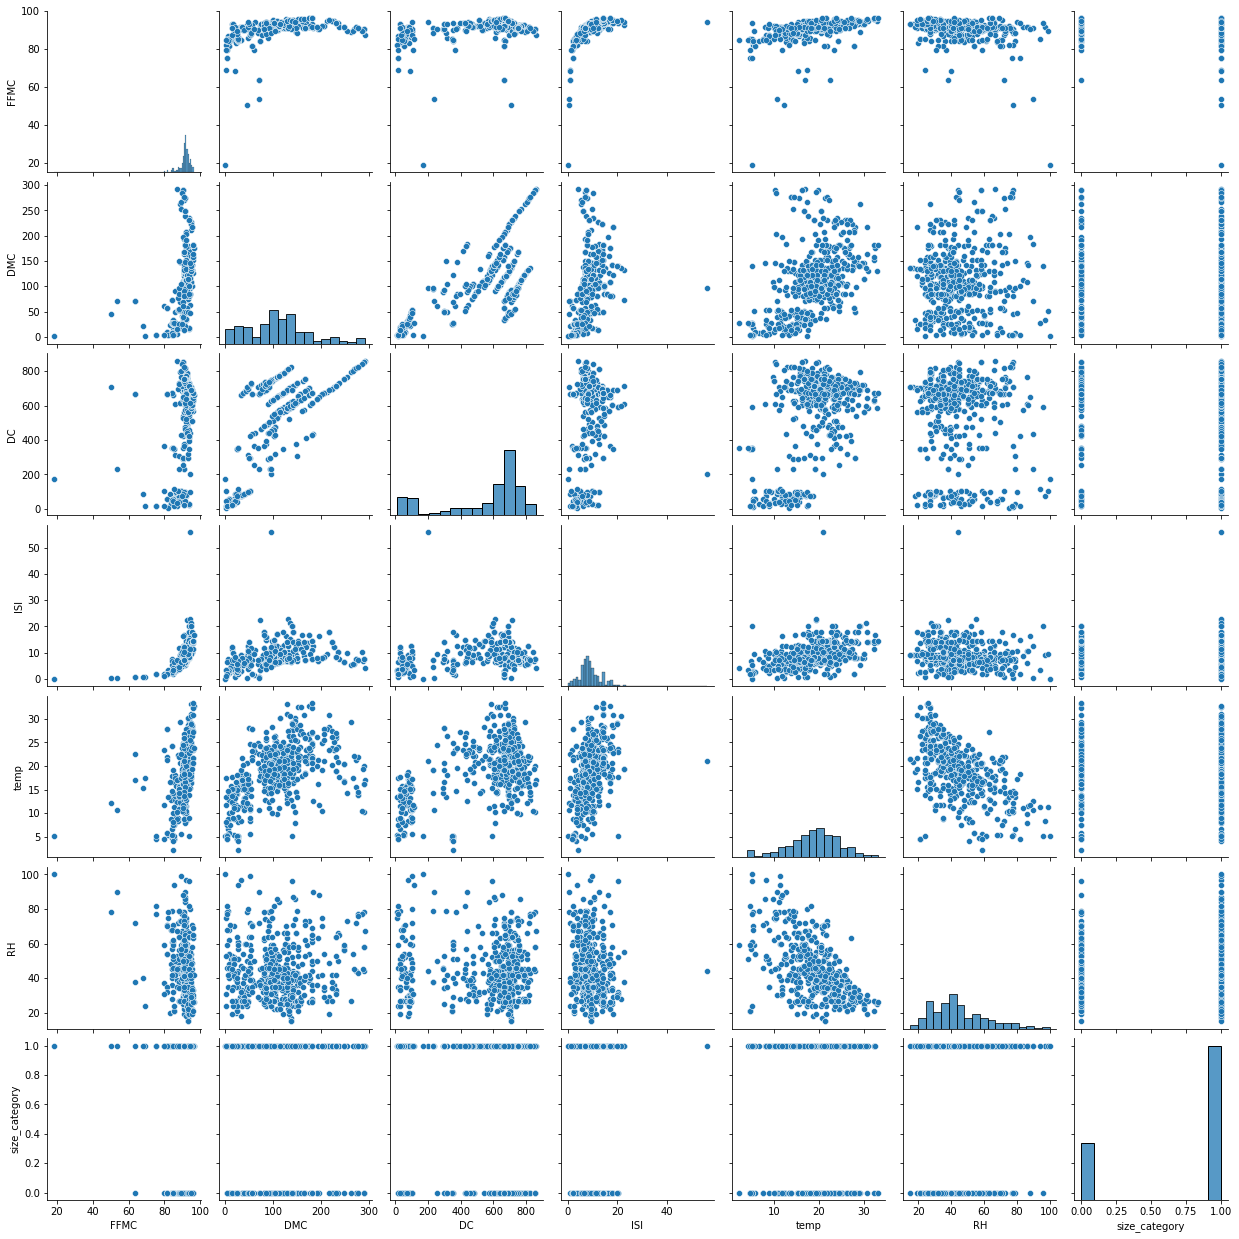

In [16]:
sns.pairplot(df)
plt.show

In [17]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,1.000000


In [18]:
array = df.values
X = array[:,0:6]
Y = array[:,6]

In [19]:
X

array([[ 86.2,  26.2,  94.3,   5.1,   8.2,  51. ],
       [ 90.6,  35.4, 669.1,   6.7,  18. ,  33. ],
       [ 90.6,  43.7, 686.9,   6.7,  14.6,  33. ],
       ...,
       [ 81.6,  56.7, 665.6,   1.9,  21.2,  70. ],
       [ 94.4, 146. , 614.7,  11.3,  25.6,  42. ],
       [ 79.5,   3. , 106.7,   1.1,  11.8,  31. ]])

In [20]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [22]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [23]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7313063063063063)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.71794871794873


array([[  2,  38],
       [  3, 113]], dtype=int64)

In [26]:
clf = SVC(kernel = 'poly')
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 74.35897435897436


array([[  0,  40],
       [  0, 116]], dtype=int64)

In [27]:
clf = SVC(kernel = 'rbf')
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 74.35897435897436


array([[  0,  40],
       [  0, 116]], dtype=int64)

In [28]:
clf = SVC(kernel = 'linear')
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 74.35897435897436


array([[  0,  40],
       [  0, 116]], dtype=int64)